# Assignment 7

## Code Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [4]:
# Load the dataset
df = pd.read_csv('Spotify_Youtube.csv')

df.head()
# Focus on the following three columns: Liveness, Energy, Loudness

,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Comments
0,Gorillaz,0.818,0.705,6,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,693555221.0,6220896.0,169907.0
1,Gorillaz,0.676,0.703,8,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,72011645.0,1079128.0,31003.0
2,Gorillaz,0.695,0.923,1,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,8435055.0,282142.0,7399.0
3,Gorillaz,0.689,0.739,2,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,211754952.0,1788577.0,55229.0
4,Gorillaz,0.663,0.694,10,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,618480958.0,6197318.0,155930.0


In [5]:
# Preprocess
# Check for columns with null/na values
np.where(pd.isna(df))

(array([ 218,  410,  410,  410,  411,  411,  411,  412,  412,  412,  413,
         413,  413,  414,  414,  414,  415,  415,  415,  416,  416,  416,
         417,  417,  417,  418,  418,  418,  507,  593,  593,  593,  620,
         620,  620,  622,  622,  622,  623,  623,  623,  624,  624,  624,
         625,  625,  625,  626,  626,  626,  627,  627,  627,  905,  905,
         905,  925,  925,  925,  938,  938,  938,  962,  962,  962,  968,
         968,  968,  970,  971,  971,  971,  972,  972,  972,  973,  973,
         973,  974,  974,  974,  976,  976,  976,  988,  988,  988,  989,
         989,  989,  990,  990,  990,  991,  991,  991,  992,  992,  992,
         994,  994,  994,  995,  995,  995,  997,  997,  997, 1327, 1327,
        1327, 1334, 1334, 1334, 1417, 1417, 1417, 1470, 1470, 1470, 1481,
        1481, 1481, 1494, 1494, 1494, 1495, 1495, 1495, 1557, 1557, 1590,
        1703, 1722, 1722, 1722, 1723, 1723, 1723, 1770, 1906, 1924, 1924,
        1924, 1945, 1958, 1959, 1959, 

In [6]:
# Check for missing values
df.isnull().sum()

,0
Artist,0
Danceability,0
Energy,0
Key,0
Loudness,0
Speechiness,0
Acousticness,0
Instrumentalness,0
Liveness,0
Valence,0


In [7]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
X = df[['Liveness', 'Energy', 'Loudness']].copy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-MEANS

#### Elbow Method

Text(0, 0.5, 'Inertia')

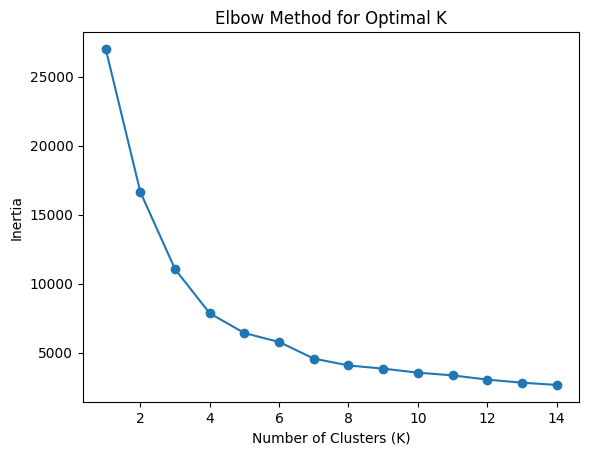

In [9]:
# Elbow method to find the optimal number of K
inertias = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

#### 3D Visualization

In [10]:
# Visualize in 3D
optimal_K = 5       # Determined based the Elbow diagram above

km = KMeans(n_clusters=optimal_K, n_init = 10, max_iter = 300, random_state=0)
y_km = km.fit_predict(X_scaled)

In [11]:
scaled_centers = km.cluster_centers_       #a list of cluster centers

df2 = scaled_centers.copy()
df2 = pd.DataFrame(df2,columns=['Liveness', 'Energy', 'Loudness'])
df2

,Liveness,Energy,Loudness
0,-0.311228,-0.808288,-0.416131
1,-0.492613,0.607334,0.511872
2,-0.391344,-2.216251,-2.936451
3,3.124490,0.313916,0.180831
4,0.778762,0.685493,0.510497


In [12]:
centers_original = scaler.inverse_transform(scaled_centers)
df3 = pd.DataFrame(centers_original,columns=['Liveness', 'Energy', 'Loudness'])
df3

,Liveness,Energy,Loudness
0,0.142656,0.426166,-11.000930
1,0.110803,0.761112,-5.986374
2,0.128587,0.093033,-24.619728
3,0.746002,0.691687,-7.775189
4,0.334069,0.779605,-5.993806


Cluster Interpretation based on their characteristics:

- Cluster 0: low liveness, moderate energy, moderate loudness (label: Moderate Studio Recording)

- Cluster 1: low liveness, high energy, high loudness (label: High-Energy Studio Banger)

- Cluster 2: low liveness, low energy, low loudness (label: Quiet Ambient)

- Cluster 3: high liveness, moderate-to-high energy, high loudness (label: Live High-Energy Performance)

- Cluster 4: moderate liveness, high energy, high loudness (label: Hybrid Live-Studio Track)

In [13]:
cluster_labels = {
    0: "Moderate Studio Recording",
    1: "High-Energy Studio Banger",
    2: "Quiet Ambient",
    3: "Live High-Energy Performance",
    4: "Hybrid Live-Studio Track",
}

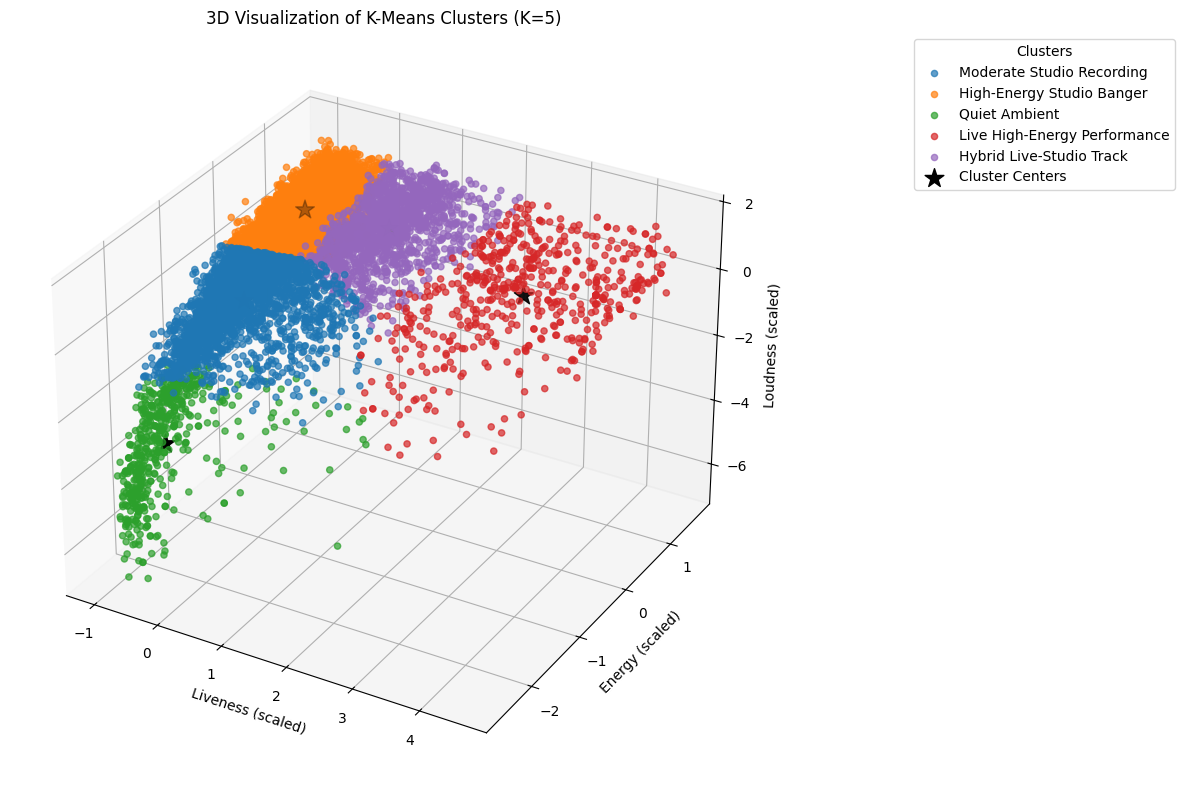

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a list to store scatter plots for legend
scatters = []

# Plot each cluster with consistent colors
for i in range(optimal_K):
    scat = ax.scatter(X_scaled[y_km==i, 0],
                      X_scaled[y_km==i, 1],
                      X_scaled[y_km==i, 2],
                      label=cluster_labels[i],
                      alpha=0.7)
    scatters.append(scat)

# Plot cluster centers
ax.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           km.cluster_centers_[:,2],
           s=200, marker='*', c='black', label='Cluster Centers')

ax.set_title(f'3D Visualization of K-Means Clusters (K={optimal_K})')
ax.set_xlabel("Liveness (scaled)")
ax.set_ylabel("Energy (scaled)")
ax.set_zlabel("Loudness (scaled)")
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', title="Clusters")

plt.tight_layout()
plt.show()

### Hierarchical Clustering

In [15]:
# Hierarchical Clustering
columns_to_cluster = ['Liveness', 'Energy', 'Loudness']

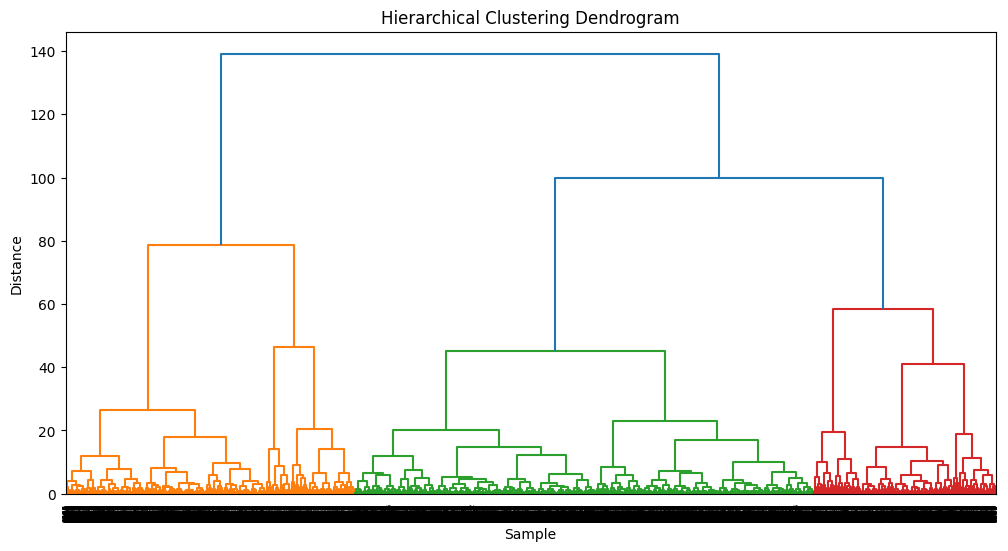

In [16]:
# Hierarchical Clustering for all - Dendrogram
all = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(all)
plt.title(f'Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

#### Dendrogram

In [16]:
X_scaled

array([[ 2.36711832,  0.37018068,  0.38369377],
       [-0.85992322,  0.36172784,  0.54358724],
       [-0.46302045,  1.29154038,  0.89242889],
       ...,
       [ 0.42531284,  0.4547091 ,  0.47622471],
       [-0.50288156,  0.85621906,  0.70792219],
       [ 0.04378508,  0.77591707,  0.07149437]])

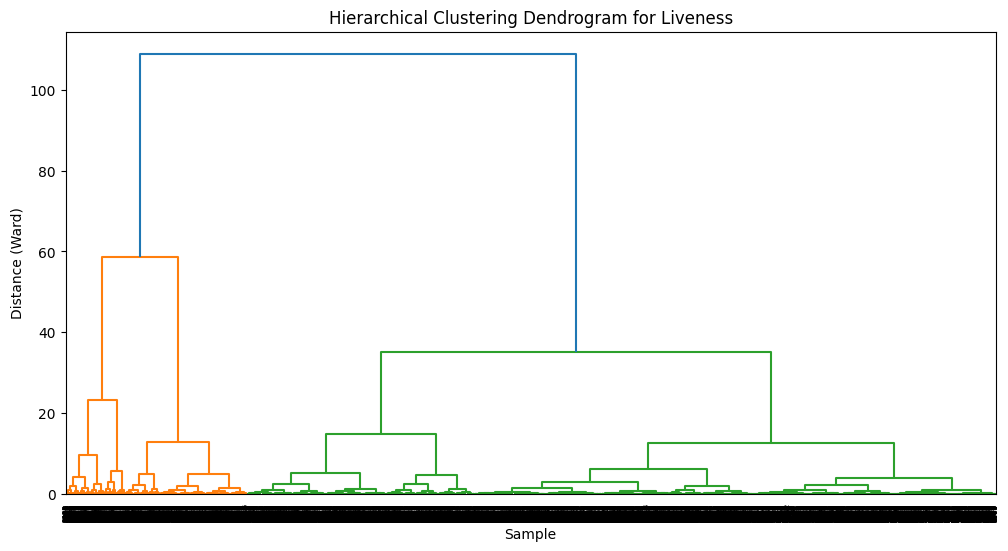

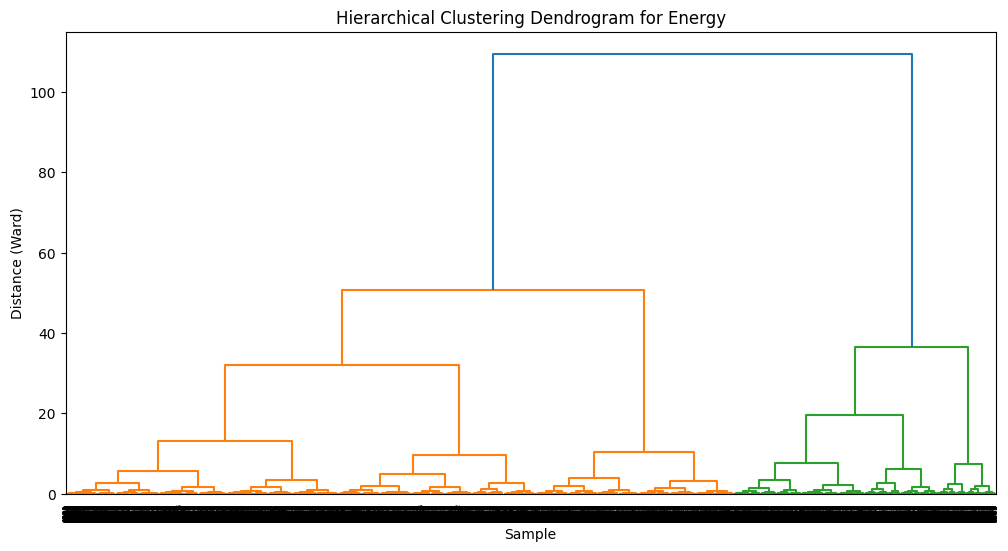

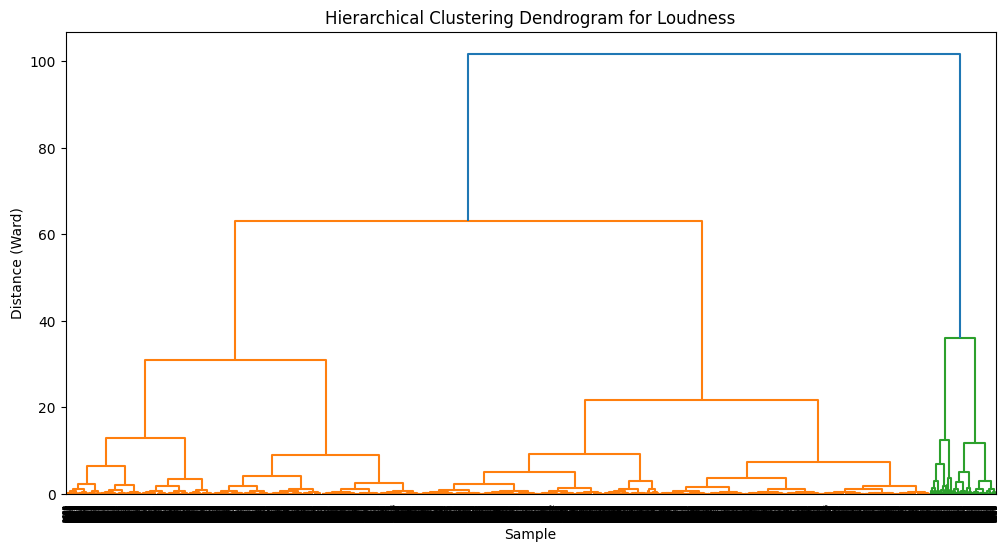

In [17]:
# Get column indices (since X_scaled is a numpy array)
column_indices = [X.columns.get_loc(col) for col in columns_to_cluster]

for i, column in enumerate(columns_to_cluster):
    # Extract the column data and reshape it for clustering (-1,1 makes it 2D)
    X_col = X_scaled[:, column_indices[i]].reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Perform hierarchical clustering
    linked = linkage(X_col, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram for {column}')
    plt.xlabel('Sample')
    plt.ylabel('Distance (Ward)')
    plt.show()

#### Clustering Result (based on n = 3 from Dendrogram)

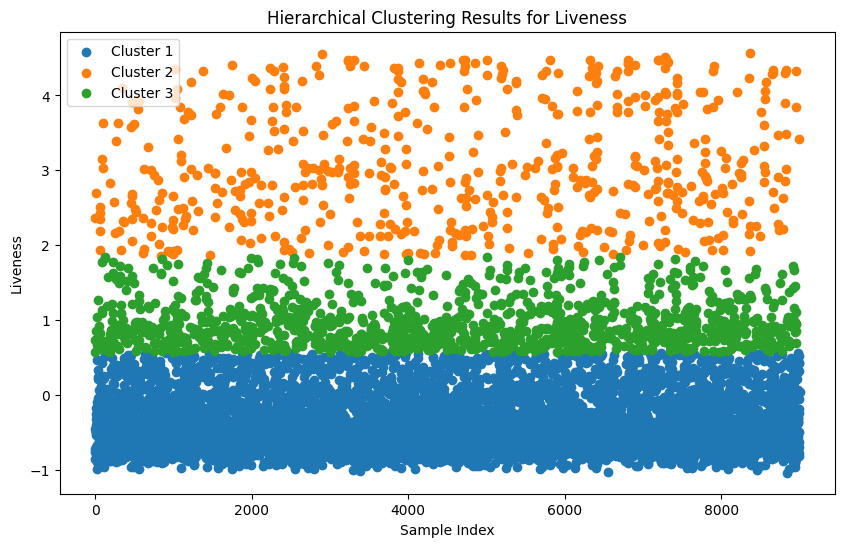


Cluster statistics for Liveness:
Cluster 1:
  Size: 7247
  Min: -1.041
  Max: 0.568
  Mean: -0.399
  Std: 0.348

Cluster 2:
  Size: 571
  Min: 1.855
  Max: 4.571
  Mean: 3.074
  Std: 0.790

Cluster 3:
  Size: 1181
  Min: 0.573
  Max: 1.843
  Mean: 0.964
  Std: 0.312



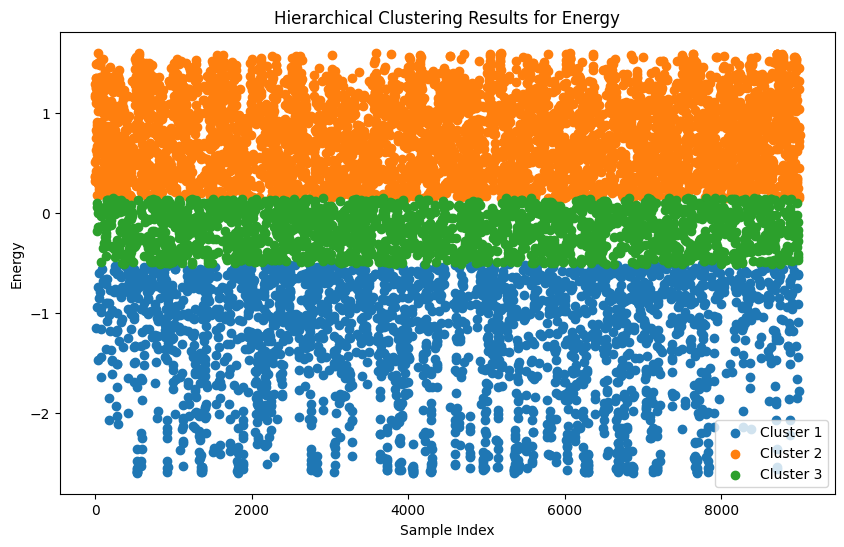


Cluster statistics for Energy:
Cluster 1:
  Size: 2532
  Min: -2.601
  Max: -0.513
  Mean: -1.304
  Std: 0.616

Cluster 2:
  Size: 4536
  Min: 0.150
  Max: 1.604
  Mean: 0.801
  Std: 0.392

Cluster 3:
  Size: 1931
  Min: -0.509
  Max: 0.146
  Mean: -0.171
  Std: 0.192



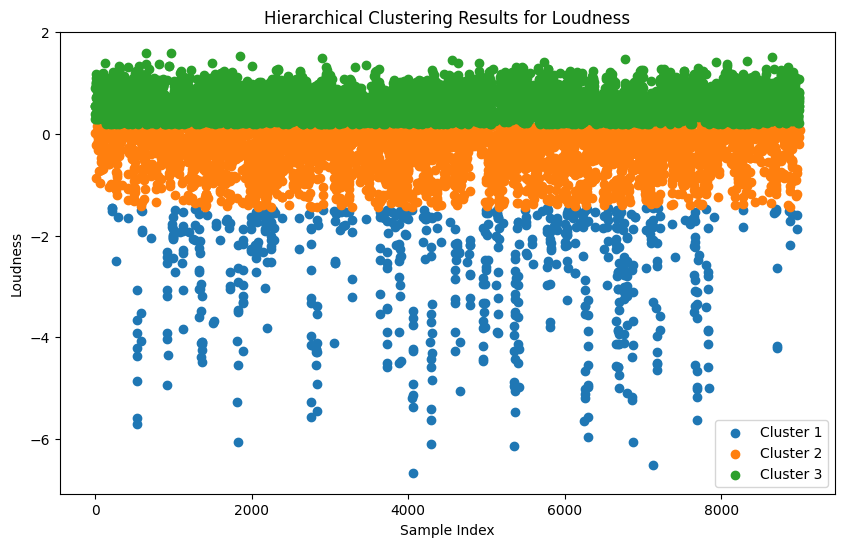


Cluster statistics for Loudness:
Cluster 1:
  Size: 632
  Min: -6.664
  Max: -1.452
  Mean: -2.757
  Std: 1.165

Cluster 2:
  Size: 3419
  Min: -1.444
  Max: 0.185
  Mean: -0.378
  Std: 0.435

Cluster 3:
  Size: 4948
  Min: 0.186
  Max: 1.594
  Mean: 0.613
  Std: 0.262



In [18]:
for i, column in enumerate(columns_to_cluster):
    # Extract the column data and reshape it for clustering (-1,1 makes it 2D)
    X_col = X_scaled[:, column_indices[i]].reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Determine number of clusters based on the individual dendrogram above, the reasonable choice is 3 clusters
    n_clusters = 3

    # Perform Agglomerative Clustering (updated parameter)
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(X_col)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(np.arange(len(X_col))[cluster_labels == i],
                   X_col[cluster_labels == i],
                   label=f'Cluster {i+1}')

    plt.title(f'Hierarchical Clustering Results for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

    # Print cluster statistics
    print(f"\nCluster statistics for {column}:")
    for i in range(n_clusters):
        cluster_data = X_col[cluster_labels == i]
        print(f"Cluster {i+1}:")
        print(f"  Size: {len(cluster_data)}")
        print(f"  Min: {cluster_data.min():.3f}")
        print(f"  Max: {cluster_data.max():.3f}")
        print(f"  Mean: {cluster_data.mean():.3f}")
        print(f"  Std: {cluster_data.std():.3f}")
        print()

##### 3D Visualization

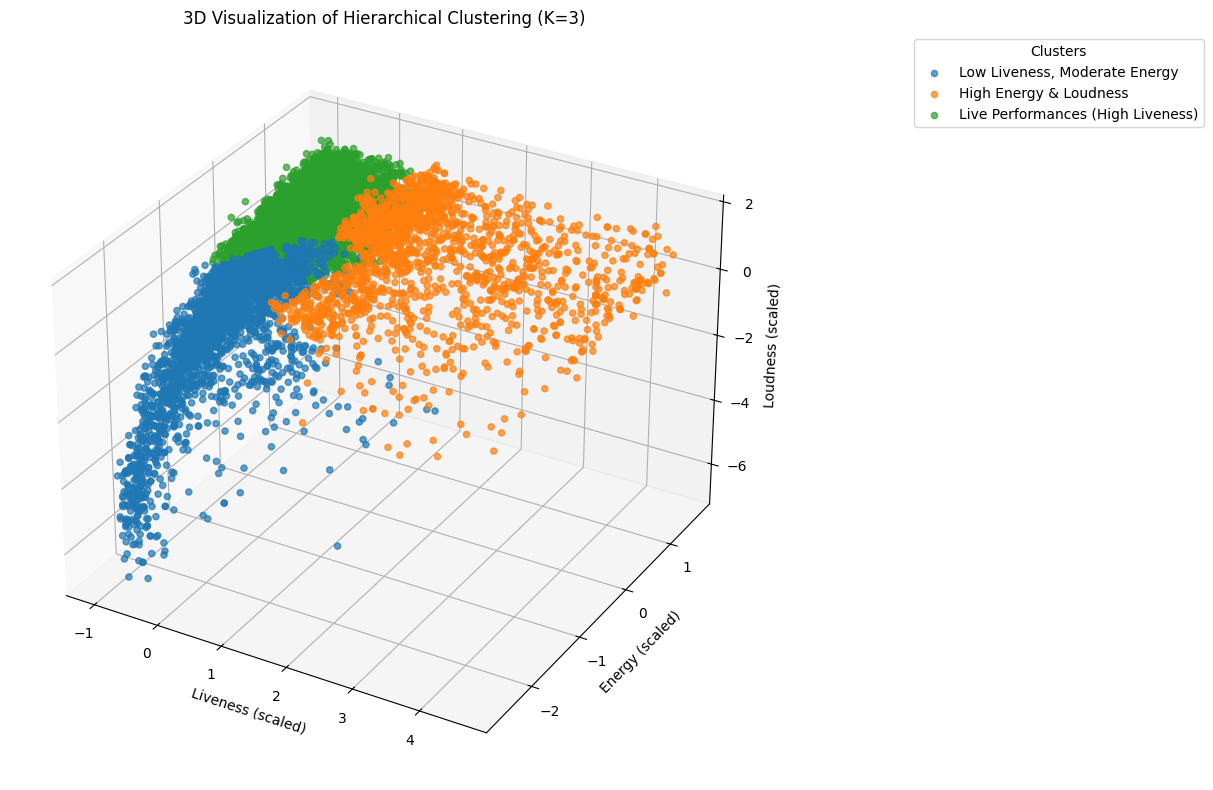

In [20]:
# Perform Agglomerative Clustering on all 3 features (3 clusters based on the dendrogram)
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_hc = hierarchical.fit_predict(X_scaled)

# 3D Plot for Hierarchical Clustering
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define cluster labels (modify based on your interpretation)
hc_cluster_labels = {
    0: "Low Liveness, Moderate Energy",
    1: "High Energy & Loudness",
    2: "Live Performances (High Liveness)"
}

# Plot each cluster
for i in range(n_clusters):
    ax.scatter(X_scaled[y_hc == i, 0],
               X_scaled[y_hc == i, 1],
               X_scaled[y_hc == i, 2],
               label=hc_cluster_labels[i],
               alpha=0.7)

ax.set_title(f'3D Visualization of Hierarchical Clustering (K={n_clusters})')
ax.set_xlabel("Liveness (scaled)")
ax.set_ylabel("Energy (scaled)")
ax.set_zlabel("Loudness (scaled)")
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', title="Clusters")

plt.tight_layout()
plt.show()

#### Clustering Result (based on n = 5 consistent with K-MEANS)

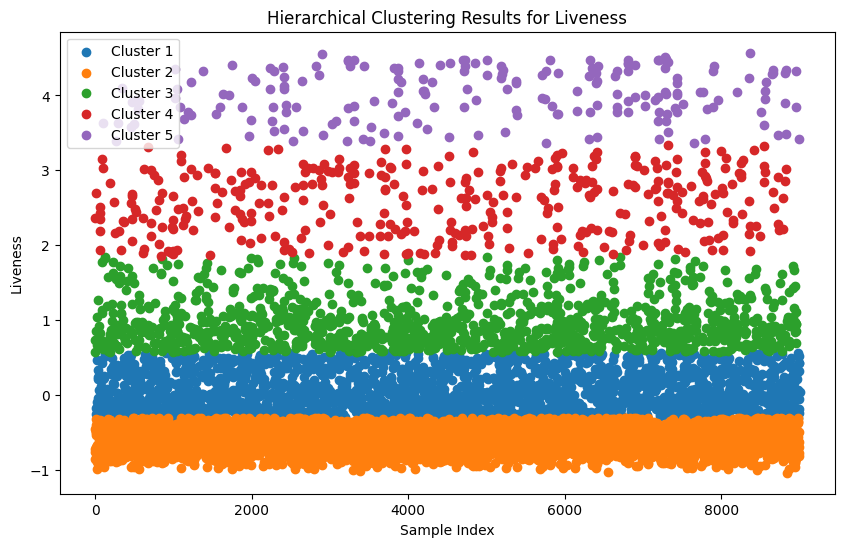


Cluster statistics for Liveness:
Cluster 1:
  Size: 2177
  Min: -0.304
  Max: 0.568
  Mean: 0.047
  Std: 0.255

Cluster 2:
  Size: 5070
  Min: -1.041
  Max: -0.309
  Mean: -0.591
  Std: 0.152

Cluster 3:
  Size: 1181
  Min: 0.573
  Max: 1.843
  Mean: 0.964
  Std: 0.312

Cluster 4:
  Size: 369
  Min: 1.855
  Max: 3.335
  Mean: 2.564
  Std: 0.411

Cluster 5:
  Size: 202
  Min: 3.364
  Max: 4.571
  Mean: 4.006
  Std: 0.335



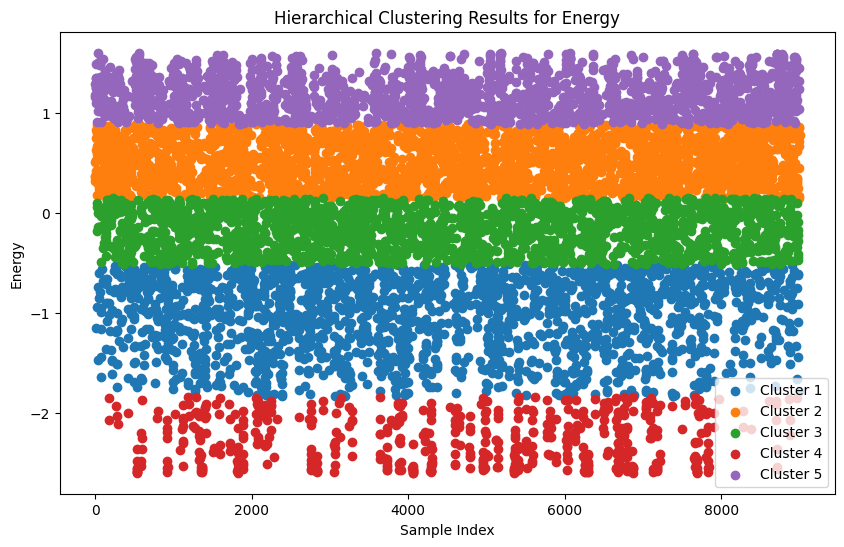


Cluster statistics for Energy:
Cluster 1:
  Size: 1969
  Min: -1.836
  Max: -0.513
  Mean: -1.029
  Std: 0.362

Cluster 2:
  Size: 2626
  Min: 0.150
  Max: 0.890
  Mean: 0.515
  Std: 0.212

Cluster 3:
  Size: 1931
  Min: -0.509
  Max: 0.146
  Mean: -0.171
  Std: 0.192

Cluster 4:
  Size: 563
  Min: -2.601
  Max: -1.840
  Mean: -2.266
  Std: 0.244

Cluster 5:
  Size: 1910
  Min: 0.894
  Max: 1.604
  Mean: 1.194
  Std: 0.188



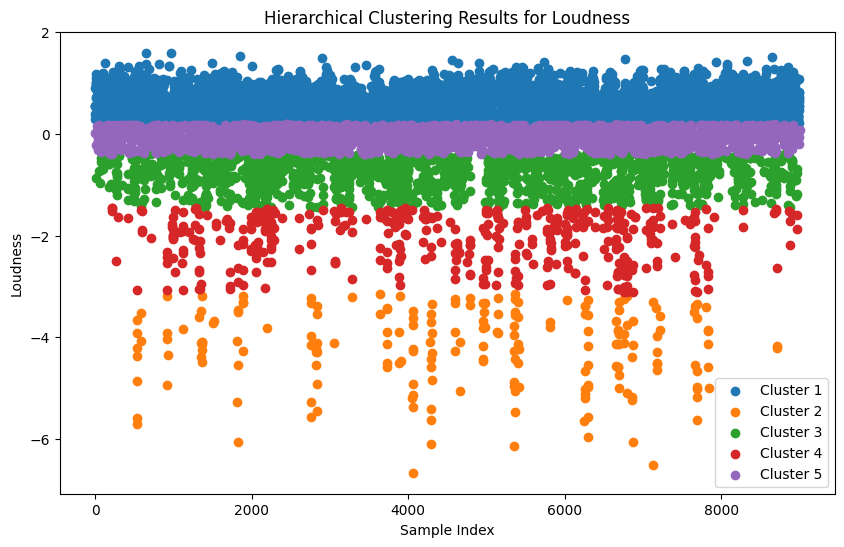


Cluster statistics for Loudness:
Cluster 1:
  Size: 4948
  Min: 0.186
  Max: 1.594
  Mean: 0.613
  Std: 0.262

Cluster 2:
  Size: 206
  Min: -6.664
  Max: -3.149
  Mean: -4.211
  Std: 0.756

Cluster 3:
  Size: 1412
  Min: -1.444
  Max: -0.398
  Mean: -0.822
  Std: 0.289

Cluster 4:
  Size: 426
  Min: -3.120
  Max: -1.452
  Mean: -2.055
  Std: 0.471

Cluster 5:
  Size: 2007
  Min: -0.395
  Max: 0.185
  Mean: -0.065
  Std: 0.167



In [19]:
# In this case, the number of clusters is set to '5' for consistency with K-MEANS
for i, column in enumerate(columns_to_cluster):
    # Extract the column data and reshape it for clustering (-1,1 makes it 2D)
    X_col = X_scaled[:, column_indices[i]].reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Determine number of clusters based on the individual dendrogram above, the reasonable choice is 3 clusters
    n_clusters = 5

    # Perform Agglomerative Clustering (updated parameter)
    cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(X_col)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(np.arange(len(X_col))[cluster_labels == i],
                   X_col[cluster_labels == i],
                   label=f'Cluster {i+1}')

    plt.title(f'Hierarchical Clustering Results for {column}')
    plt.xlabel('Sample Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

    # Print cluster statistics
    print(f"\nCluster statistics for {column}:")
    for i in range(n_clusters):
        cluster_data = X_col[cluster_labels == i]
        print(f"Cluster {i+1}:")
        print(f"  Size: {len(cluster_data)}")
        print(f"  Min: {cluster_data.min():.3f}")
        print(f"  Max: {cluster_data.max():.3f}")
        print(f"  Mean: {cluster_data.mean():.3f}")
        print(f"  Std: {cluster_data.std():.3f}")
        print()

##### 3D Visualization

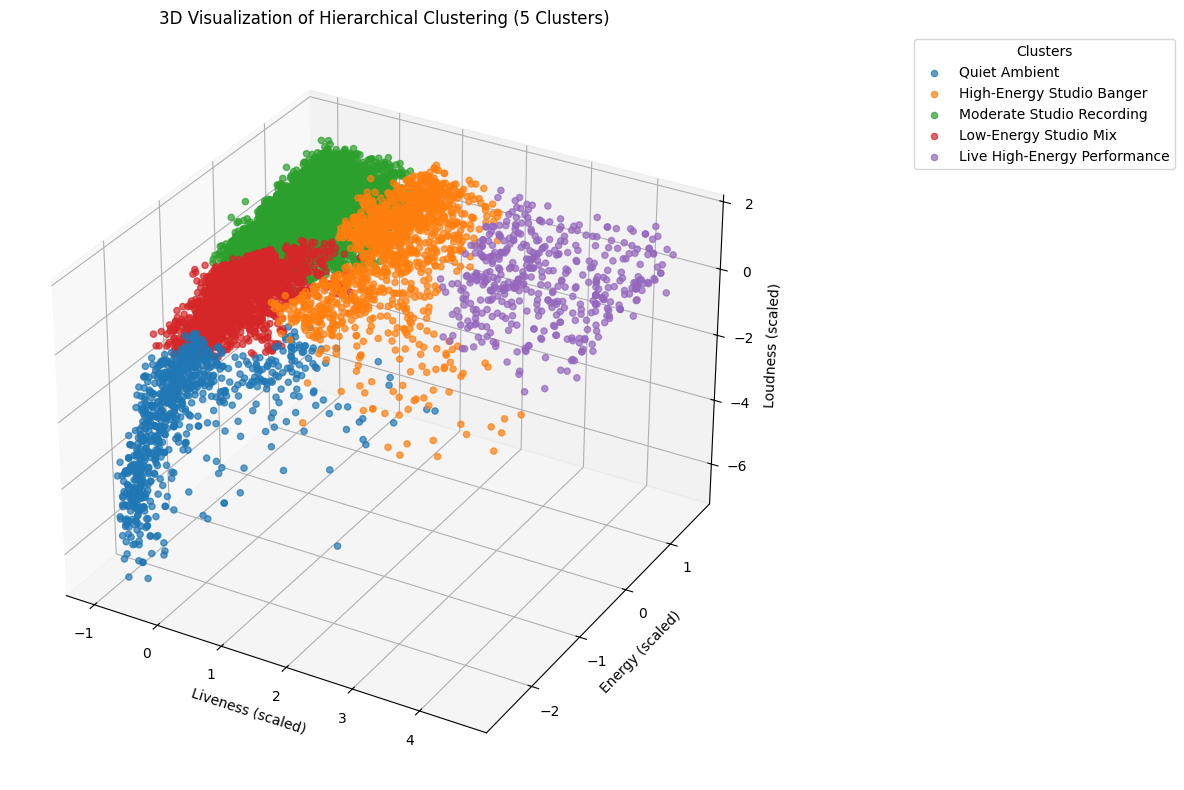


Cluster Statistics (5 Clusters):
Cluster 0 (Quiet Ambient):
  Size: 852
  Avg Liveness: -0.27
  Avg Energy: -1.98
  Avg Loudness: -2.33

Cluster 1 (High-Energy Studio Banger):
  Size: 1302
  Avg Liveness: 1.01
  Avg Energy: 0.43
  Avg Loudness: 0.29

Cluster 2 (Moderate Studio Recording):
  Size: 4442
  Avg Liveness: -0.39
  Avg Energy: 0.52
  Avg Loudness: 0.51

Cluster 3 (Low-Energy Studio Mix):
  Size: 1950
  Avg Liveness: -0.43
  Avg Energy: -0.73
  Avg Loudness: -0.42

Cluster 4 (Live High-Energy Performance):
  Size: 453
  Avg Liveness: 3.26
  Avg Energy: 0.58
  Avg Loudness: 0.38



In [27]:
# Hierarchical Clustering with 5 Clusters (to match K-means)
n_clusters = 5
hierarchical_5 = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_hc_5 = hierarchical_5.fit_predict(X_scaled)

# 3D Plot for Hierarchical Clustering (5 Clusters)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

hc_cluster_labels_5 = {
    0: "Quiet Ambient",                     # Very low Energy (-1.98), Loudness (-2.33)
    1: "High-Energy Studio Banger",         # High Liveness (1.01), moderate Energy/Loudness
    2: "Moderate Studio Recording",         # Balanced Energy (0.52), Loudness (0.51)
    3: "Low-Energy Studio Mix",             # Subdued Energy (-0.73), neutral Loudness (-0.42)
    4: "Live High-Energy Performance"       # Extreme Liveness (3.26), high Energy/Loudness
}

# Plot each cluster
for i in range(n_clusters):
    ax.scatter(X_scaled[y_hc_5 == i, 0],
               X_scaled[y_hc_5 == i, 1],
               X_scaled[y_hc_5 == i, 2],
               label=hc_cluster_labels_5[i],
               alpha=0.7)

ax.set_title('3D Visualization of Hierarchical Clustering (5 Clusters)')
ax.set_xlabel("Liveness (scaled)")
ax.set_ylabel("Energy (scaled)")
ax.set_zlabel("Loudness (scaled)")
ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', title="Clusters")

plt.tight_layout()
plt.show()

# Print cluster statistics
print("\nCluster Statistics (5 Clusters):")
for i in range(n_clusters):
    cluster_data = X_scaled[y_hc_5 == i]
    print(f"Cluster {i} ({hc_cluster_labels_5[i]}):")
    print(f"  Size: {len(cluster_data)}")
    print(f"  Avg Liveness: {cluster_data[:, 0].mean():.2f}")
    print(f"  Avg Energy: {cluster_data[:, 1].mean():.2f}")
    print(f"  Avg Loudness: {cluster_data[:, 2].mean():.2f}\n")

## Report on Hierarchical clustering

***The word / pdf version will be suggested with the corresponding graph.***

In this assignment, we analyzed audio characteristics from the Spotify/YouTube dataset by focusing on three key features: liveness (recording type), energy (track intensity), and loudness (volume level). Both K-means clustering (with 3D visualization) and hierarchical clustering (individual dimensions) were utilized to identify meaningful patterns in the data.
For K-Means Clustering, the dataset was pre-processed and scaled for optimal k determination. The elbow graph below suggested K=5 as the optimal number of clusters, as the inertia curve starts to flatten at K=5, meaning that the addition of clusters provides less significant improvements in segmentation.

After selecting the number of clusters, K-MEANS clustering was performed to segment the dataset. Here is the semantic cluster interpretation based on their characteristics:
1.	Cluster 0

•	Characterized as low liveness, moderate energy, moderate loudness

•	Labelled as ‘Moderate Studio Recording’

2.	Cluster 1

•	Characterized as low liveness, high energy, high loudness

•	Labelled as ‘High-Energy Studio Banger’

3.	Cluster 2

•	Characterized as low liveness, low energy, low loudness

•	Labelled as ‘Quiet Ambient’

4.	Cluster 3

•	Characterized as high liveness, moderate-to-high energy, high loudness

•	Labelled as ‘Live High-Energy Performance’

5.	Cluster 4

•	Characterized as moderate liveness, high energy, high loudness

•	Labelled as ‘Hybrid Live-Studio Track’

To better visualize the clustering results, a 3D scatter plot was then implemented with cluster centers and interpretable labels. The x-axis is liveness, y-axis for energy, and z-axis for loudness, with all three features pre-scaled. Each data point represents a song, colored by its own cluster.

For hierarchical clustering, we performed on each individual dimension (liveness, energy, and loudness). To begin with, the dendrogram analysis was performed on all three features and each of the individual columns respectively.

The goal is to visualize the arrangement of clusters, showing the similarities between clusters (merging at low position refers to highly similar clusters) and helping determine the optimal number of clusters (a large vertical gap between merges suggests a natural stopping point, and by cutting at that gap, the number of horizontal lines intersected by the cut corresponds to the number of clusters).
   
   
Based on dendrograms above, 3 clusters were selected to perform agglomerative clustering. The clustering was later performed with 5 clusters as well for consistency with the previous K-MEANS.
     
For liveness, cluster 1 with low liveness covers the majority of tracks, indicating most are studio-recorded. Cluster 2 is a small but distinct group with extremely high liveness values, likely concert recordings. Cluster 3 with moderate liveness may represent live tracks with post-processing or studio-audience mixes. Overall, cluster 2 is small but extreme category, while cluster 1 dominates - confirming that most tracks are studio-produced.

For energy, cluster 2 with high energy is the largest, which may suggest the given Spotify_YouTube dataset skews toward upbeat music. Cluster 1 with low energy is distinct with wider spread, possibly representing genres like classical or lo-fi, and the cluster 3 is characterized with moderate energy.

For loudness, the cluster 3 with high loudness covers the majority, aligning with the "loudness war" trend in modern music. Cluster 1 with low loudness is the smallest cluster, indicating fewer ultra-soft recordings in the dataset, and the cluster 2 labels moderate-to-low loudness, suggesting typical of most mainstream tracks.

Those clusters can be used for music recommendations, suggesting tracks with similar energy/loudness profiles, or genre analysis (for example, high-energy, loud tracks may correlate with specific genres like hip-hop). Besides, based on the cluster size, quiet tracks might not align with the preference of YouTube / Spotify users or caused by platform biases.

The following is the same agglomerative clustering performed with 5 clusters, with the main purpose of being consistent with the K-MEANS analysis.
   
For liveness, compared with the previous 3 clusters, the original low-liveness cluster is split into cluster 1 (lightly processed live tracks with near-zero mean) and cluster 2 (studio with strongly negative mean). Besides, the original high-liveness cluster is split into cluster 4 (professionally mixed live tracks with high liveness) and cluster 5 (the smallest group - unfiltered live recordings with extreme liveness). In this case, it provides a more precise distinction between raw live, processed live, and studio tracks.

For energy, the original low-energy cluster is split into cluster 1 (mildly relaxing with low energy) and cluster 4 (extreme low energy, likely ASMR). The original high-energy cluster is split into cluster 2 (balanced range with moderate-to-high energy) and cluster 5 (music with peak intensity of energy - likely death metal). Clusters 2 and cluster 3 capture the middle range in terms of energy, which can be useful for mood-based playlists. By isolating niche genres, the playlist recommendation system can be optimized, tailoring to energy extremes like workout or relaxation.

For loudness, the original quiet cluster is split into cluster 2 (likely non-music content with extreme low loudness) and cluster 4 (delicate music with low loudness). The original moderate cluster is split into cluster 3 (natural dynamics like jazz with moderate quiet) and cluster 5 (nearly neutral loudness with borderline loudness). Cluster 1 covers the majority, implying the user / platform preference on loud tracks, and cluster 2 is tiny, suggesting very few soft (very quiet) tracks in the dataset. In this case, it supports more sensitive content-type detection, as cluster 2 can filter out non-music tracks, and better dynamic range awareness, as it highlights production styles.

The 3D visualization was performed on the hierarchical clustering result, with 3 clusters and 5 clusters respectively.
  
Cluster 0 (Quiet Ambient) is characterized with a soft vibe, which can be ideal for relaxation or background music. Cluster 1 (High-Energy Studio Bangers) covers those loud, energetic, and polished tracks, which can be a natural fit for party playlists or gym sessions. Cluster 2 (Moderate Studio Recordings) is most prevalent in the YouTube / Spotify platform with noticeable cluster size: they are energetic and loud, but more balanced compared with cluster 1 (like radio-friendly pop or rock that’s designed for broad appeal rather than peak intensity). Cluster 3 (Low-Energy Studio Mix) is soft but not too sleepy, which can be ideal for focused work or winding down. Cluster 4 (Live High-Energy Performances) captures the raw excitement of concerts, which can be appealing to someone who prefers live shows.

The overall distribution generally aligns with K-MEANS results, and those breakdowns can help tailor playlists to moods, building a more precise music recommendation system.


In summary, this analysis segmented Spotify/YouTube tracks into distinct acoustic profiles using K-means and hierarchical clustering based on patterns in liveness, energy, and loudness.

The K-means approach (K=5) identified five intuitive categories (from high-energy studio bangers to quiet ambient tracks), while hierarchical clustering provided granular insights into individual features, such as isolating ultra-low-energy ASMR-like tracks or raw live performances.
The results align with real-world music trends (prevalence on moderate pop music) and show potential platform biases toward less energetic productions.

Future data processing may include exploring genre correlations (label clusters as specific genres), investigating user behaviors (correlate cluster attributes with user engagement), and therefore optimize the recommendation system by combining clustering with collaborative filtering.